In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("深度缺陷.png")#读入图像
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#将图像转化为灰度图像
#cv2.imshow("Image",image)#显示图像
# cv2.waitKey()
canny = cv2.Canny(image, 30, 150)
# cv2.imshow("Canny",canny)
# cv2.waitKey()
plt.imshow(canny, cmap='gray')
img_array = np.array(canny)
# img_array[400]

In [2]:
# kernel = np.ones((2, 2), np.uint8)
# dilation = cv2.dilate(canny,kernel, iterations = 1)
# # plt.imshow(dilation, cmap='gray')
# # img_array = np.array(dilation)
# img_array[400]
# cv2.imshow("dilation", dilation)
# cv2.waitKey()
# cv2.destroyAllWindows()

True

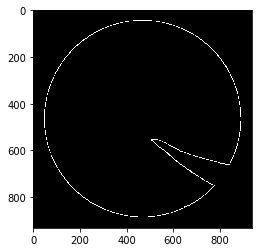

In [3]:
kernel = np.ones((3, 3), np.uint8)  
closing = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')
# img_array[400]
# cv2.imshow("closing",closing)
# cv2.waitKey()
# cv2.destroyAllWindows()
img_array = np.array(closing)
cv2.imwrite("edge.jpeg", closing)

图像的边缘检测已经完成，圆的边缘上的所有点都变成了255，背景为0。
现在开始使用最小二乘法寻找圆心

$$(x - x_{0})^{2} + (y - y_{0})^{2} = R^{2}$$

In [4]:
from scipy.optimize import leastsq
# train_x = np.array([])
# train_y = np.array([])
train_x = []
train_y = []
for i in range(len(img_array)):
    for j in range(len(img_array[0])):
        if(img_array[i][j] == 255):
            train_x.append(i)
            train_y.append(j)

train_x = np.array(train_x)
train_y = np.array(train_y)
len(train_x)

10724

In [5]:
def func(p, x, y):
    x0, y0, R = p
    return (x - x0) ** 2 + (y - y0) ** 2 - (R ** 2)

def error(p, x, y):
    return func(p, x, y) - 0

p0=[100, 100, 100]

para = leastsq(error, p0, args=(train_x, train_y))

x0, y0, R = para[0]
p = [x0, y0, R]
p

[446.23984534936653, 451.80924672756504, -394.5791198395317]

In [6]:
cnt = 0
defect_x = []
defect_y = []

for i in range(len(train_x)):
    # print(i)
    # print(train_y[i])
    # print(abs(func(p, i, train_y[i])))
    if abs(func(p, train_x[i], train_y[i])) > 1800:
        defect_x.append(train_x[i])
        defect_y.append(train_y[i])
len(defect_x)

10010

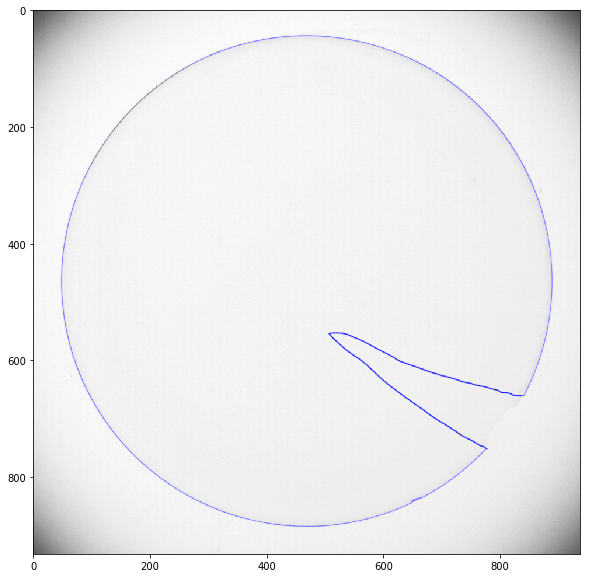

True

In [8]:
for i in range(len(defect_x)):
    img[defect_x[i]][defect_y[i]][2] = 255
# cv2.imshow("after", img)
# cv2.waitKey()
# cv2.destroyAllWindows()
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()
cv2.imwrite("final.jpeg", img)